# Predictive Modeling for Agriculture

Measuring essential soil metrics such as nitrogen, phosphorous, and potassium levels, and pH value is an important aspect of assessing soil condition. But it is an expensive and time-consuming process, and due to budget constraints, farmers sometimes prioritize which metrics to measure. Their primary objective is to maximize crop yield, given the soil condition (and other factors). Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

In this project, I use my machine learning knowledge to help a farmer select the best crops for their fields. Specifically, I build multi-class classification models to predict the most suitable `"crop"` for each field and assess the most important features for predictive performance.

The idea and data for this project are from [this DataCamp project](https://app.datacamp.com/learn/projects/1772).

## The dataset

The dataset, `soil_measures.csv`, contains the following columns:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.

## Load and inspect data

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
# Load and inspect data
crop_fields = pd.read_csv("soil_measures.csv")
print(crop_fields.info())
crop_fields.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
N       2200 non-null int64
P       2200 non-null int64
K       2200 non-null int64
ph      2200 non-null float64
crop    2200 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 86.0+ KB
None


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


The data frame has no missing values. Let's inspect the values in the target (`crop`) column.

In [3]:
crop_fields["crop"].value_counts()

apple          100
banana         100
kidneybeans    100
mungbean       100
coffee         100
rice           100
papaya         100
muskmelon      100
blackgram      100
grapes         100
lentil         100
cotton         100
orange         100
chickpea       100
maize          100
mango          100
pomegranate    100
coconut        100
pigeonpeas     100
mothbeans      100
watermelon     100
jute           100
Name: crop, dtype: int64

Since there are more than 2 unique entries, we'll use multi-class (multinomial) classification.

## Split data

In [4]:
# Split data into features and target
X = crop_fields.drop("crop", axis="columns")
y = crop_fields["crop"]

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Build models

In [6]:
features = X.columns  # Get feature names
feature_importances = {}  # Dictionary to store performance metric for each model

In [26]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000)

In [28]:
for feature in features:
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    feature_importances[feature] = f1_score(y_test, y_pred, average="weighted", labels=np.unique(y_pred))

In [29]:
feature_importances

{'N': 0.15998074270647455,
 'P': 0.22236200987896387,
 'K': 0.3827630893450084,
 'ph': 0.08214957808880906}

According to the models, soil potassium (`K`) level has the greatest effect on crop yield across all the fields.

Let's visualize the feature importances.

In [39]:
# Sort `feature_importances` in descending order of the values
feat_imp_sorted = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))
feat_imp_sorted

{'K': 0.3827630893450084,
 'P': 0.22236200987896387,
 'N': 0.15998074270647455,
 'ph': 0.08214957808880906}

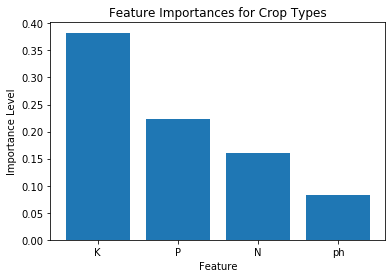

In [40]:
plt.bar(x=feat_imp_sorted.keys(), height=feat_imp_sorted.values())
plt.title("Feature Importances for Crop Types")
plt.xlabel("Feature")
plt.ylabel("Importance Level")
plt.show()